# Het classificeren van sterren met een algoritme

Het is 2025 en een nieuwe ruimtetelescoop, de Gaia-2, heeft een enorme dataset verzameld van sterren in onze Melkweg. Maar hoe kunnen astronomen orde scheppen in deze gigantische hoeveelheid gegevens? Zijn er duidelijke groepen sterren te herkennen, en kunnen we ze automatisch classificeren?

Om patronen in de sterrenhemel te ontdekken, gebruiken astronomen al lange tijd het Hertzsprung-Russell (HR)-diagram. Dit diagram toont de relatie tussen de temperatuur en de helderheid van sterren en onthult verschillende categorieën sterren, zoals hoofdreekssterren, reuzen en witte dwergen.

Maar stel je voor dat je deze indeling niet handmatig maakt, maar een computer laat bepalen hoe sterren gegroepeerd worden. Kunnen algoritmes dezelfde sterrenklassen herkennen als astronomen? In deze les ga jij als data-wetenschapper aan de slag met een clustering-algoritme, namelijk k-means clustering, om sterren automatisch in groepen te verdelen.

Je hoeft zelf niet te programmeren, maar je zult wel werken met een dataset en een algoritme dat sterren indeelt op basis van overeenkomsten. Door de uitkomsten te analyseren, ontdek je hoe computers patronen kunnen herkennen in astronomische gegevens.

## De eigenschappen van sterren
Voordat we naar het HR-diagram en clustering kijken, is het belangrijk om te begrijpen welke eigenschappen van sterren van invloed zijn op hun classificatie.

- **Temperatuur (Kelvin, K):** Hoe hoger de temperatuur, hoe blauwer de ster. Koelere sterren zijn rood of oranje.
- **Helderheid (absolute magnitude):** Dit geeft aan hoeveel licht een ster daadwerkelijk uitstraalt. Helderheid hangt samen met de grootte en energieproductie van een ster.
- **Spectraaltype:** Dit is een indeling gebaseerd op de chemische samenstelling en temperatuur van een ster. De letters O, B, A, F, G, K en M worden gebruikt om sterren te classificeren, waarbij O de heetste en M de koelste sterren zijn.
- **Massa:** Dit bepaalt hoe snel een ster brandstof verbrandt en hoe lang hij leeft. Zware sterren hebben een kortere levensduur en eindigen vaak spectaculair in een supernova.

#### Vraag 1
Als je deze eigenschappen bekijkt, welke denk je dat het belangrijkste zijn om sterren in te delen?

## Het Hertzsprung-Russell (HR)-diagram
Astronomen hebben al meer dan een eeuw sterren geclassificeerd op basis van hun temperatuur en helderheid. Dit heeft geleid tot het Hertzsprung-Russell (HR)-diagram, een van de meest fundamentele grafieken in de astronomie.

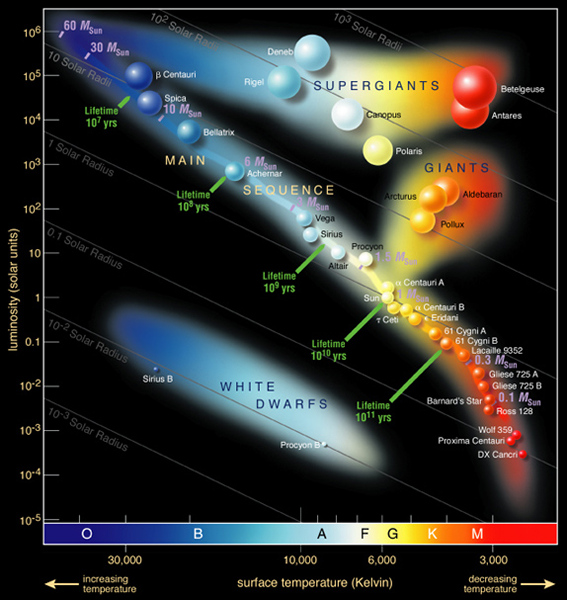

(Bron: https://www.cosmos.esa.int/web/cesar/the-hertzsprung-russell-diagram)

### Hoe werkt het HR-diagram?
Het HR-diagram zet de temperatuur van een ster (op de horizontale as) uit tegen de helderheid van een ster (op de verticale as). Een paar belangrijke dingen vallen meteen op:

- De temperatuur loopt van links (heet) naar rechts (koud), wat anders is dan je misschien gewend bent.
- Helderdere sterren staan hoger in het diagram, terwijl zwakkere sterren lager staan.

### Welke sterren vinden we in het HR-diagram?
Het HR-diagram is niet zomaar een willekeurige verzameling punten; sterren groeperen zich in verschillende regio’s. De belangrijkste groepen zijn:

- **Hoofdreekssterren:** De meeste sterren, waaronder de zon, bevinden zich op een diagonaal die van linksboven naar rechtsonder loopt. Hier verbranden sterren waterstof in hun kern en bevinden ze zich in een stabiele fase van hun leven.
- **Reuzen en superreuzen:** Oudere sterren die hun waterstofbrandstof bijna hebben opgebruikt, zwellen op en worden extreem helder. Dit zijn de meest lichtgevende sterren in het HR-diagram.
- **Witte dwergen:** Wanneer een ster geen kernfusie meer uitvoert, blijft er een klein, heet overblijfsel over. Witte dwergen zijn erg warm, maar hebben een lage helderheid omdat ze zo klein zijn.

#### Vraag 2

Stel dat je een ster ontdekt die een lage temperatuur heeft maar toch zeer helder is. In welke categorie van het HR-diagram zou deze ster waarschijnlijk vallen? Leg je antwoord uit.

# Visualisatie van het Hertzsprung-Russell (HR)-diagram maken

Nu we begrijpen hoe het Hertzsprung-Russell (HR)-diagram werkt, gaan we een visualisatie maken van de verdeling van sterren in dit diagram. Door sterren in een grafiek te plotten op basis van hun temperatuur en helderheid, kunnen we patronen en groepen herkennen.

Om het HR-diagram te visualiseren, hebben we een dataset nodig met de eigenschappen van verschillende sterren. De belangrijkste variabelen die we nodig hebben zijn:

- Temperatuur (Kelvin): Dit wordt op de horizontale as weergegeven, waarbij hogere temperaturen links staan en lagere temperaturen rechts.
- Helderheid (absolute magnitude): Dit wordt op de verticale as weergegeven. Helderdere sterren staan hoger, zwakkere sterren lager.
- Spectraaltype of stercategorie: Dit kan als kleurcodering gebruikt worden om verschillende stergroepen te onderscheiden.

Met behulp van een eenvoudige scatterplot kunnen we het HR-diagram maken.

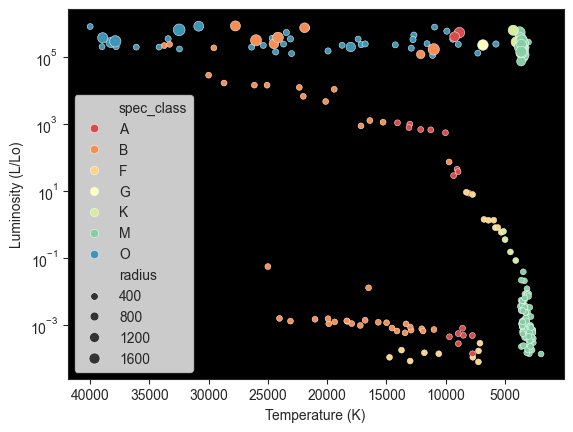

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Laden van de dataset (deze dataset moet eigenschappen van sterren bevatten)
data = pd.read_csv("6 class csv.csv")

original_names=data.columns.values
new_names=['temperature','luminosity','radius','absolute_mag','type','color','spec_class']
mapper=dict(zip(original_names, new_names))
data_prepared=data.rename(mapper, axis=1)

data_prepared['color']=data_prepared['color'].astype('category')

data_prepared['type']=pd.Categorical.from_codes(data_prepared['type'], 
                                    categories=['Red Dwarf','Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'Super Giant', 'Hyper Giant'])

data_prepared['spec_class']=data_prepared['spec_class'].astype('category')

#Category reorder:
#data_prepared['spec_class']=data_prepared['spec_class'].cat.reorder_categories

stars=data_prepared.copy()

#Hertzprung-Rusell diagram
sns.set_style('ticks')
ax=sns.scatterplot(stars, x='temperature', y='luminosity', hue='spec_class', size='radius', palette='Spectral')
ax.invert_xaxis()
ax.set_yscale("log")
ax.set_ylabel('Luminosity (L/Lo)')
ax.set_xlabel('Temperature (K)')
ax.set_facecolor('k')

Wanneer het HR-diagram is geplot, kunnen we kijken naar de verdeling van sterren:

- Hoofdreekssterren bevinden zich op een diagonale lijn van linksboven naar rechtsonder.
- Reuzen en superreuzen zijn te vinden in de bovenste regionen van het diagram.
- Witte dwergen zitten in de onderste regio’s, met een hoge temperatuur maar lage helderheid.

#### Vraag 3
Hoe veel verschillende cluster verwacht jij automatisch te kunnen onderscheiden?

# Clustering met k-means: Automatische classificatie van sterren

Nu we het Hertzsprung-Russell (HR)-diagram hebben gevisualiseerd, gaan we een algoritme gebruiken om sterren automatisch te groeperen op basis van hun eigenschappen. We gebruiken het k-means clustering-algoritme om sterren in verschillende groepen in te delen.

## Wat is k-means clustering?
K-means is een ongecontroleerd machine learning-algoritme dat gegevens in 𝑘 groepen (clusters) verdeelt op basis van overeenkomsten tussen datapunten. Dit gebeurt als volgt:
1. Kies een aantal clusters 𝑘 (bijvoorbeeld 3 of 4).
2. Selecteer willekeurig  𝑘 middelpunten in de dataset.
3. Wijs elke ster toe aan de dichtstbijzijnde middelpunt.
4. Verplaats de middelpunten naar het gemiddelde van de sterren in die cluster.
5. Herhaal dit proces totdat de clusters stabiel blijven.

Om k-means clustering toe te passen, gebruiken we de dataset met stereigenschappen zoals:
- Temperatuur (Kelvin)
- Helderheid (absolute magnitude)

Voor een betere clustering kunnen we extra kenmerken toevoegen, zoals de spectraaltypen of de massa van sterren.

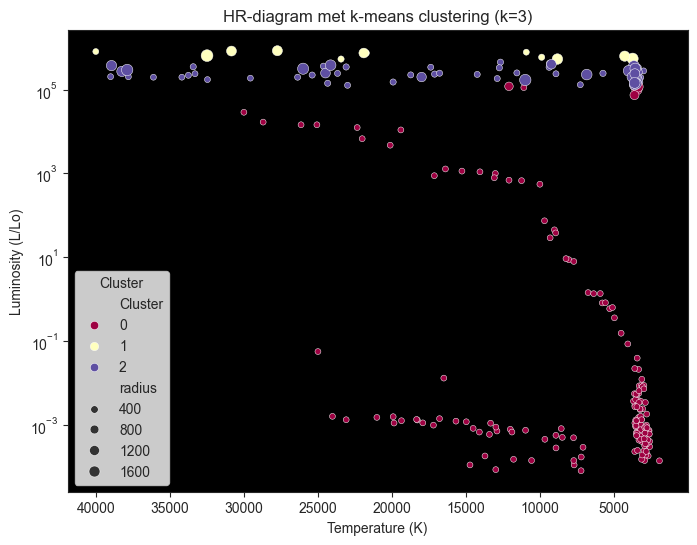

In [2]:
from sklearn.cluster import KMeans
# Selecteer de kenmerken voor clustering
X = stars[['temperature', 'luminosity']]

# K-means toepassen met een gekozen aantal clusters (bijv. k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
stars['Cluster'] = kmeans.fit_predict(X)

# Kleur de clusters met Seaborn
sns.set_style('ticks')
plt.figure(figsize=(8,6))

ax = sns.scatterplot(data=stars, x='temperature', y='luminosity', hue=stars['Cluster'], size='radius', palette='Spectral')

# Omkeren van de x-as (hete sterren links, koude sterren rechts)
ax.invert_xaxis()

# Logaritmische schaal instellen voor helderheid
ax.set_yscale("log")

# Labels en achtergrond instellen
ax.set_ylabel('Luminosity (L/Lo)')
ax.set_xlabel('Temperature (K)')
ax.set_facecolor('k')

# Weergeven van de plot
plt.legend(title="Cluster")
plt.title(f"HR-diagram met k-means clustering (k={k})")
plt.show()

#### Vraag 4
Bovenstaande figuur is gemaakt met 3 clusters. Zijn de sterren ingedeeld in de goede cluster? Zo nee hoeveel clusters verwacht je nodig te hebben?

Test nu zelf met wat het optimale aantal clusters zijn

Voer het aantal clusters in (bijv. 2-10):  6


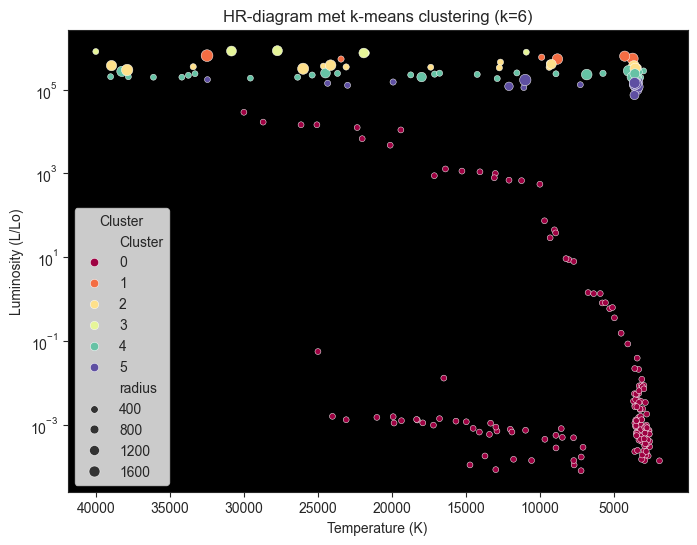

In [8]:
# Vraag de gebruiker om een waarde voor k
while True:
    try:
        k = int(input("Voer het aantal clusters in (bijv. 2-10): "))
        if k < 1:
            raise ValueError
        break
    except ValueError:
        print("Ongeldige invoer. Voer een geheel getal groter dan 1 in.")

# K-means clustering uitvoeren
kmeans = KMeans(n_clusters=k, random_state=42)
stars['Cluster'] = kmeans.fit_predict(X)

# Seaborn stijl instellen
sns.set_style('ticks')
plt.figure(figsize=(8,6))

# Scatterplot van sterren met clusters
ax = sns.scatterplot(data=stars, x='temperature', y='luminosity', hue='Cluster', size='radius', palette='Spectral')

# Omkeren van de x-as (hete sterren links, koude sterren rechts)
ax.invert_xaxis()

# Logaritmische schaal instellen voor helderheid
ax.set_yscale("log")

# Labels en achtergrond instellen
ax.set_ylabel('Luminosity (L/Lo)')
ax.set_xlabel('Temperature (K)')
ax.set_facecolor('k')

# Plot tonen
plt.legend(title="Cluster")
plt.title(f"HR-diagram met k-means clustering (k={k})")
plt.show()

Wat is volgens jouw het optimale aantal clusters?

Het valt je misschien op dat het lastig is om de cluster terug te vinden uit het HR-diagram boven aan. Echter, hebben sterren meer kenmerken dat alleen temperatuur en helderheid. Nu mag jezelf bepalen welke kenmereken je gebruikt om de sterren te classificeren. Je hebt de keuze uit de volgende kenmerken:
- temperature
- luminosity
- radius
- absolute_mag
- color
- spec_class

Voer de namen van de kenmerken in die je wilt gebruiken, gescheiden door een komma (bijvoorbeeld: temperature,luminosity). Let op dat je alleen kenmerken kiest die in de dataset staan! Bepaal hierbij ook het optimaal aantal clusters. 

Voer de kenmerken in die je wilt gebruiken voor clustering, gescheiden door een komma (bijv. temperature,luminosity):  temperature,luminosity,radius,absolute_mag,color,spec_class
Voer het aantal clusters in (bijv. 2-10):  6


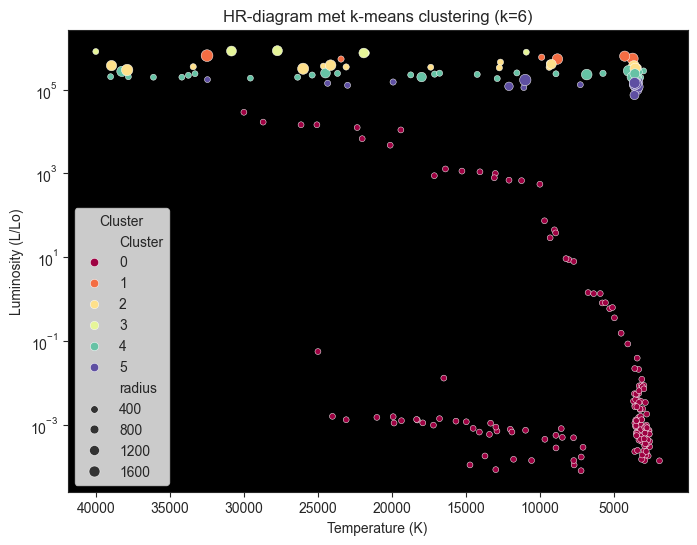

In [30]:
from sklearn.preprocessing import LabelEncoder
stars=data_prepared.copy()
# Vraag de gebruiker om kenmerken te kiezen
while True:
    selected_features = input("Voer de kenmerken in die je wilt gebruiken voor clustering, gescheiden door een komma (bijv. temperature,luminosity): ").split(',')
    selected_features = [feature.strip() for feature in selected_features]  # Verwijder spaties

    # Controleren of alle geselecteerde kenmerken in de dataset staan
    if all(feature in stars.columns for feature in selected_features):
        break
    else:
        print("Ongeldige invoer. Zorg ervoor dat de kenmerken correct gespeld zijn en in de dataset staan.")

# Vraag de gebruiker om een waarde voor k
while True:
    try:
        k = int(input("Voer het aantal clusters in (bijv. 2-10): "))
        if k < 1:
            raise ValueError
        break
    except ValueError:
        print("Ongeldige invoer. Voer een geheel getal groter dan 1 in.")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
stars['color'] = le.fit_transform(stars['color'])  # Converteert kleuren naar getallen
stars['spec_class'] = le.fit_transform(stars['spec_class'])

# K-means clustering uitvoeren
X = stars[selected_features]  # Gebruik de geselecteerde kenmerken
kmeans = KMeans(n_clusters=k, random_state=42)
stars['Cluster'] = kmeans.fit_predict(X)

# Seaborn stijl instellen
sns.set_style('ticks')
plt.figure(figsize=(8,6))

# Plot alleen als temperatuur en helderheid zijn gekozen, anders een standaard plot
if 'temperature' in selected_features and 'luminosity' in selected_features:
    ax = sns.scatterplot(data=stars, x='temperature', y='luminosity', hue='Cluster', size='radius', palette='Spectral')
    ax.invert_xaxis()  # Omkeren van de x-as
    ax.set_yscale("log")  # Logaritmische schaal voor helderheid
    ax.set_ylabel('Luminosity (L/Lo)')
    ax.set_xlabel('Temperature (K)')
    ax.set_facecolor('k')
    plt.legend(title="Cluster")
    plt.title(f"HR-diagram met k-means clustering (k={k})")
else:
    print("Geen standaard HR-diagram weergegeven. Clustering is uitgevoerd met de geselecteerde kenmerken.")

# Plot tonen
plt.show()
# temperature,luminosity,radius,absolute_mag,color,spec_class

#### Vraag 5
Wat is het optimaal aantal clusters en welke kenmereken heb je hier voor gebruikt?

#### Vraag 6
Zijn de clusters nu anders ingedeeld? Waar zie je dat aan?

# Uitdaging: Optimaliseer het aantal clusters (𝑘)

Nu je hebt gezien hoe k-means clustering sterren groepeert, is het tijd om een belangrijke vraag te beantwoorden: Hoeveel clusters (𝑘) zijn ideaal?

Het juiste aantal clusters bepalen is essentieel, omdat:
- Te weinig clusters sterren samenvoegt die eigenlijk verschillend zijn.
- Te veel clusters de sterren te veel opdeelt en ruis introduceert.

Een handige methode om het optimale 𝑘 te vinden, is de Elbow-methode.

## Hoe werkt de Elbow-methode?
De Elbow-methode meet de inertia van k-means, oftewel de gemiddelde afstand van elk punt tot het dichtstbijzijnde clustercentrum.

Belangrijk om te weten:
- Hoe lager de inertia, hoe beter de clustering.
- Maar als 𝑘 te groot wordt, daalt de verbetering nauwelijks nog.
- Dit punt waar de curve ‘afvlakt’ wordt de "knik" (elbow) genoemd en is vaak de beste keuze voor 𝑘.

Hieronder staat een codefragment waarmee je de Elbow-methode kunt toepassen. Hiermee test je verschillende waarden van 𝑘 en visualiseer je de resultaten.

Voer de kenmerken in die je wilt gebruiken voor clustering, gescheiden door een komma (bijv. temperature,luminosity):  temperature,luminosity,radius,absolute_mag,color,spec_class


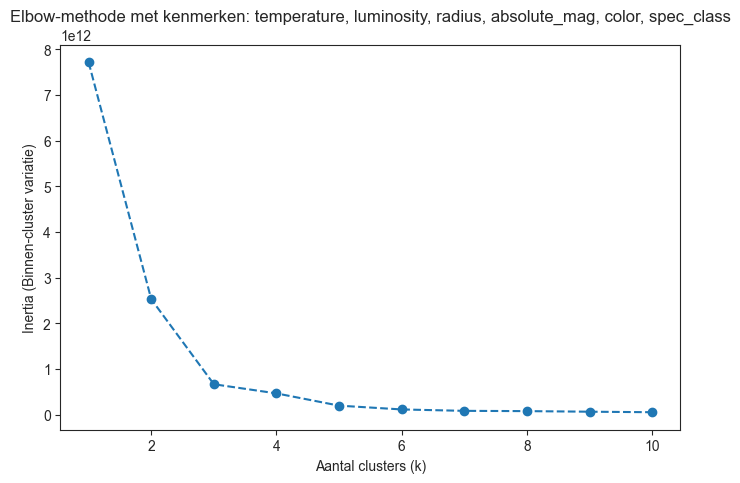

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

stars=data_prepared.copy()
# Vraag de gebruiker om kenmerken te kiezen
while True:
    selected_features = input("Voer de kenmerken in die je wilt gebruiken voor clustering, gescheiden door een komma (bijv. temperature,luminosity): ").split(',')
    selected_features = [feature.strip() for feature in selected_features]  # Verwijder spaties

    # Controleren of alle geselecteerde kenmerken in de dataset staan
    if all(feature in stars.columns for feature in selected_features):
        break
    else:
        print("Ongeldige invoer. Zorg ervoor dat de kenmerken correct gespeld zijn en in de dataset staan.")

le = LabelEncoder()
stars['color'] = le.fit_transform(stars['color'])  # Converteert kleuren naar getallen
stars['spec_class'] = le.fit_transform(stars['spec_class'])

# K-means clustering uitvoeren
X = stars[selected_features]  # Gebruik de geselecteerde kenmerken

# Test verschillende waarden van k
inertia_values = []
k_values = list(range(1, 11))  # Test k van 1 tot 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  # Inertia opslaan

# Plot de Elbow-methode
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_values, marker='o', linestyle='dashed')

# Labels en titel toevoegen
plt.xlabel("Aantal clusters (k)")
plt.ylabel("Inertia (Binnen-cluster variatie)")
plt.title(f"Elbow-methode met kenmerken: {', '.join(selected_features)}")
plt.show()

#### Vraag 7
Wat is de optimale 𝑘 volgens de Elbow-methode? Komt dit overeen met jou eigen gekozen 𝑘? 

#### Vraag 8
Veranderd de optimale 𝑘 volgens de Elbow-methode als je de kenmerken aanpast?